In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [130]:
exp_data = pd.read_csv('/content/drive/MyDrive/demographic_data_update_02.csv')
exp_data2 = pd.read_csv('/content/drive/MyDrive/demographic_data_update_03.csv')

In [131]:
exp_data.head()

,ID,Name,Joining Date,Age,Birth Date,Gender,Education,Average Working Hours,Skill Level,Defect Type,Defect Rate
0,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,30.952374,Intermediate,SPI Errors,0.474453
1,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.083474,Intermediate,SPI Errors,0.753039
2,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,37.246623,Intermediate,High Low,0.173610
3,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,31.716454,Intermediate,High Low,0.865333
4,53333,Eric Carr,2023-12-14,25,1999-04-24,Female,Diploma,32.490001,Intermediate,High Low,0.846176


In [132]:
exp_data.count()

ID                       5000
Name                     5000
Joining Date             5000
Age                      5000
Birth Date               5000
Gender                   5000
Education                5000
Average Working Hours    5000
Skill Level              5000
Defect Type              5000
Defect Rate              5000
dtype: int64

In [133]:
fields_to_drop = ['ID', 'Name', 'Birth Date', 'Age', 'Gender', 'Education', 'Average Working Hours', 'Skill Level']

# Drop the specified fields
exp_data.drop(columns=fields_to_drop, inplace=True)

In [134]:
exp_data.head()

,Joining Date,Defect Type,Defect Rate
0,2023-12-14,SPI Errors,0.474453
1,2023-12-14,SPI Errors,0.753039
2,2023-12-14,High Low,0.173610
3,2023-12-14,High Low,0.865333
4,2023-12-14,High Low,0.846176


In [135]:
Y = exp_data['Defect Rate']
X = exp_data.drop("Defect Rate", axis = 1)

In [136]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Defect Type"]
one_hot = OneHotEncoder()
transformed = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformed.fit_transform(X)
transformed_x

array([[0.0, 0.0, 0.0, 1.0, '2023-12-14'],
       [0.0, 0.0, 0.0, 1.0, '2023-12-14'],
       [1.0, 0.0, 0.0, 0.0, '2023-12-14'],
       ...,
       [0.0, 0.0, 1.0, 0.0, '2022-04-27'],
       [0.0, 0.0, 1.0, 0.0, '2022-04-27'],
       [1.0, 0.0, 0.0, 0.0, '2022-04-27']], dtype=object)

In [137]:
transformed_x.shape

(5000, 5)

In [138]:
has_null_values = any(x is None for x in exp_data['Joining Date'])

# Print result
print(has_null_values)

False


In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming '2022-10-04' is in a column named 'Joining Date'
# Make sure 'Joining Date' contains string values representing dates

# Instantiate the RandomForestRegressor model
model = RandomForestRegressor()

# Split the data into training and testing sets
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_x, Y, test_size=0.2)

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'Joining Date' column to encoded integers
X_train['Joining Date'] = label_encoder.fit_transform(X_train['Joining Date'])
X_test['Joining Date'] = label_encoder.transform(X_test['Joining Date'])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

2nd Approch


In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [141]:
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

In [142]:
time_data.head()

,Employee_ID,Date,Defect_Type,Defect_Count,Defect_Rate,Weekday
0,EMP592,2024-01-01,Openseam,63,83.339036,Monday
1,EMP592,2024-01-01,SPI Errors,68,35.136620,Monday
2,EMP592,2024-01-01,High Low,91,67.000427,Monday
3,EMP592,2024-01-01,Runoff,57,32.988883,Monday
4,EMP592,2024-01-02,Runoff,57,71.167554,Tuesday


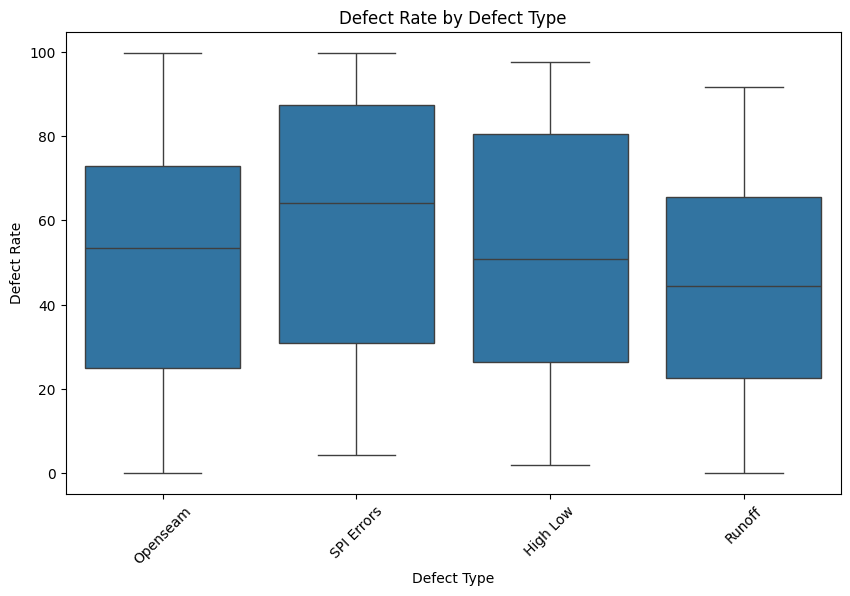

In [143]:
# Using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Defect_Type', y='Defect_Rate', data=time_data)
plt.title('Defect Rate by Defect Type')
plt.xlabel('Defect Type')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

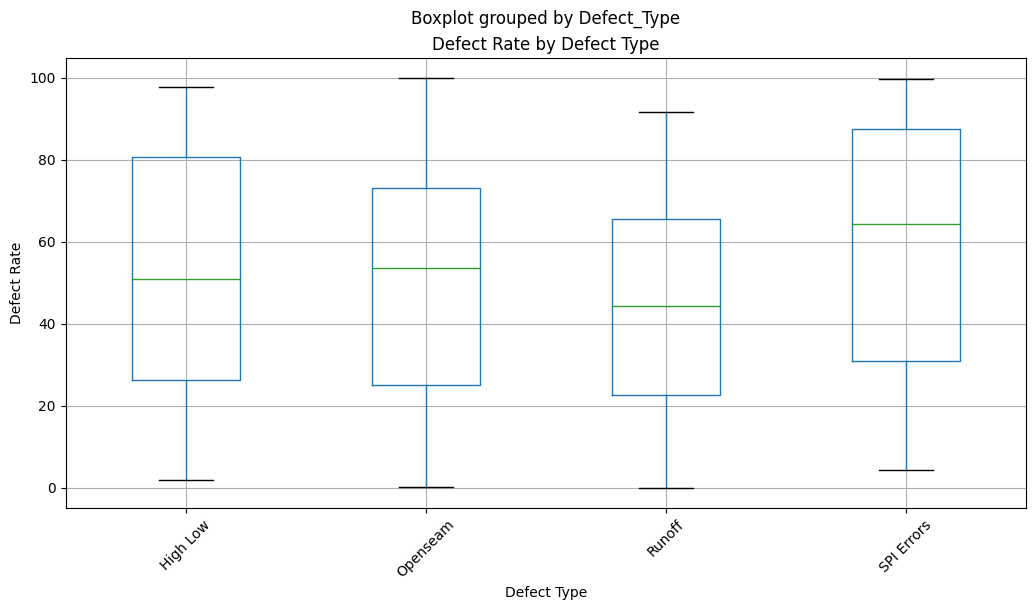

In [144]:
# Using Matplotlib
plt.figure(figsize=(10, 6))
time_data.boxplot(column='Defect_Rate', by='Defect_Type', figsize=(12, 6))
plt.title('Defect Rate by Defect Type')
plt.xlabel('Defect Type')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.show()

In [145]:
time_data.count()

Employee_ID     250
Date            250
Defect_Type     250
Defect_Count    250
Defect_Rate     250
Weekday         250
dtype: int64

In [146]:
fields_to_drop = ['Employee_ID', 'Date']

# Drop the specified fields
time_data.drop(columns=fields_to_drop, inplace=True)

In [147]:
# fields_to_drop = ['Weekday']

# # Drop the specified fields
# time_data.drop(columns=fields_to_drop, inplace=True)

In [148]:
time_data.head()

,Defect_Type,Defect_Count,Defect_Rate,Weekday
0,Openseam,63,83.339036,Monday
1,SPI Errors,68,35.136620,Monday
2,High Low,91,67.000427,Monday
3,Runoff,57,32.988883,Monday
4,Runoff,57,71.167554,Tuesday


In [149]:
Y = time_data['Defect_Rate']
X = time_data.drop("Defect_Rate", axis = 1)

In [150]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Defect_Type", "Weekday"]
one_hot = OneHotEncoder()
transformed = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_x = transformed.fit_transform(X)
transformed_x

array([[ 0.,  1.,  0., ...,  0.,  0., 63.],
       [ 0.,  0.,  0., ...,  0.,  0., 68.],
       [ 1.,  0.,  0., ...,  0.,  0., 91.],
       ...,
       [ 0.,  0.,  1., ...,  1.,  0., 80.],
       [ 0.,  0.,  0., ...,  0.,  1., 86.],
       [ 0.,  0.,  1., ...,  0.,  1., 65.]])

In [151]:
transformed_x.shape

(250, 10)

In [152]:
from sklearn.ensemble import RandomForestRegressor

# Model
model = RandomForestRegressor()
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_x, Y, test_size=0.2)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

-0.1811371942409632

In [153]:
# Function to convert occurrences and number to input data
def convert_to_input_data(occurrences, weekday, number):
    # Combine occurrences and number into an array
    input_data = np.array([*occurrences, *weekday, number])
    return input_data

# Model prediction function
def make_prediction(model, input_data):
    # Reshape the input data for prediction
    input_data_reshaped = np.asarray(input_data).reshape(1, -1)
    # Make prediction
    prediction = model.predict(input_data_reshaped)
    return prediction

def convert_occurrence_to_array(occurrence, max_occurrence):
    # Initialize an array to store the occurrence
    occurrence_array = [0] * max_occurrence
    # Convert the occurrence to an index
    index = occurrence - 1
    # Set the value at the index to 1 if within range
    if 0 <= index < max_occurrence:
        occurrence_array[index] = 1
    return occurrence_array

# Sample occurrences and number
occurrences = 4
weekday = 1
defects_count = 69

# Convert occurrences and number to input data
input_data = convert_to_input_data(convert_occurrence_to_array(occurrences, 4), convert_occurrence_to_array(weekday, 5), defects_count)

# Make prediction
prediction = make_prediction(model, input_data)
print(prediction)

[25.32726896]


In [154]:
import plotly.graph_objs as go

occurrences = 3
defects_count = 69
predictions = []

for weekday in range(6):
    input_data = convert_to_input_data(convert_occurrence_to_array(occurrences, 4), convert_occurrence_to_array(weekday, 5), defects_count)
    prediction = make_prediction(model, input_data)
    predictions.append(prediction[0])  # Flatten the predictions list

print(predictions)

# Create traces
trace = go.Scatter(
    x=list(range(6)),
    y=predictions,
    mode='markers+lines',
    marker=dict(
        size=10,
        color='rgba(255, 182, 193, .9)',
        line=dict(width=2, color='rgb(0, 0, 0)')
    ),
    line=dict(
        color='rgb(0, 0, 0)',
        width=2
    )
)

data = [trace]

# Create layout
layout = go.Layout(
    title='Predictions vs. Weekday',
    xaxis=dict(
        title='Weekday',
        tickvals=list(range(6)),
        ticktext=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
        range=[0, 5]  # Restrict x-axis scale between values 2 and 4
    ),
    yaxis=dict(
        title='Prediction Value',
    )
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
fig.show()


[42.340944392252034, 27.859722522088706, 36.25955496788338, 64.44775833059727, 37.923994151842756, 58.35097273859589]


In [155]:
# # !pip install fbprophet
# !conda install -c conda-forge fbprophet
# sudo apt-get install -y python3-pystan python3-pip python3-setuptools python3-matplotlib
# !pip install fbprophet

RMSE on training set: 28.56418060704438
RMSE on testing set: 33.852652354258886


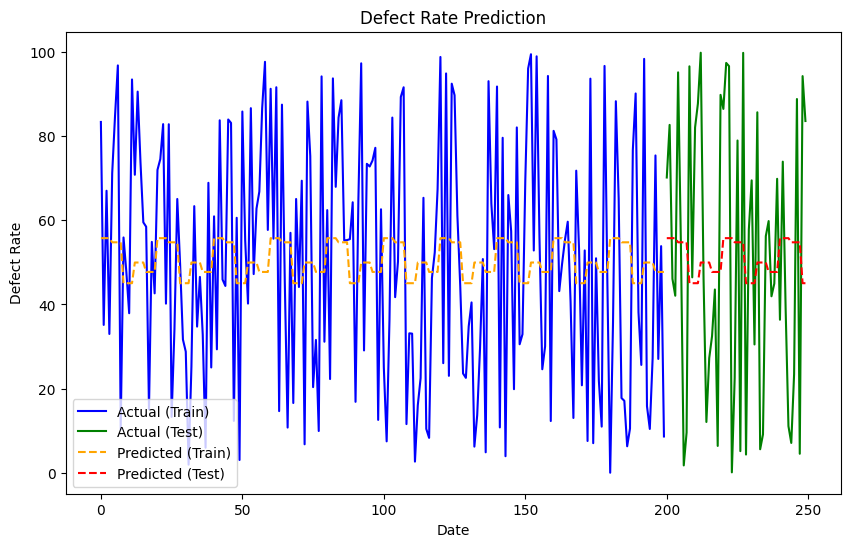

In [156]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Extract weekday feature
time_data['Day_of_Week'] = time_data['Date'].dt.dayofweek

# Split features and target variable
X = time_data[['Day_of_Week']]  # Only include the 'Day_of_Week' feature
y = time_data['Defect_Rate']

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE on training set: {rmse_train}")
print(f"RMSE on testing set: {rmse_test}")

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(time_data.index[:train_size], y_train, label='Actual (Train)', color='blue')
plt.plot(time_data.index[train_size:], y_test, label='Actual (Test)', color='green')
plt.plot(time_data.index[:train_size], y_pred_train, label='Predicted (Train)', color='orange', linestyle='--')
plt.plot(time_data.index[train_size:], y_pred_test, label='Predicted (Test)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.title('Defect Rate Prediction')
plt.legend()
plt.show()


RMSE on training set: 28.56517543858035
RMSE on testing set: 33.805847946712895


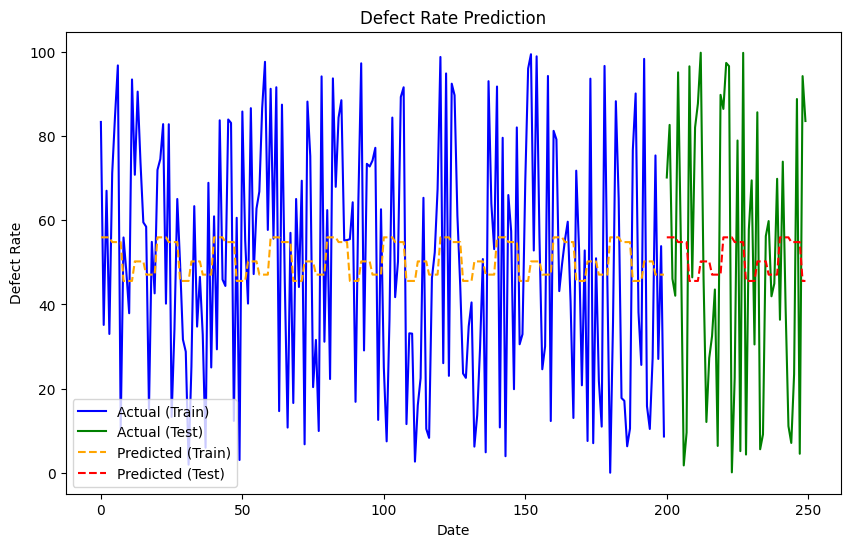

In [157]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Extract weekday feature
time_data['Day_of_Week'] = time_data['Date'].dt.dayofweek

# Split features and target variable
X = time_data[['Day_of_Week']]  # Only include the 'Day_of_Week' feature
y = time_data['Defect_Rate']

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE on training set: {rmse_train}")
print(f"RMSE on testing set: {rmse_test}")

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(time_data.index[:train_size], y_train, label='Actual (Train)', color='blue')
plt.plot(time_data.index[train_size:], y_test, label='Actual (Test)', color='green')
plt.plot(time_data.index[:train_size], y_pred_train, label='Predicted (Train)', color='orange', linestyle='--')
plt.plot(time_data.index[train_size:], y_pred_test, label='Predicted (Test)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.title('Defect Rate Prediction')
plt.legend()
plt.show()

<ipython-input-158-9bc1501ef652>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RMSE for Openseam: 29.33504955058655


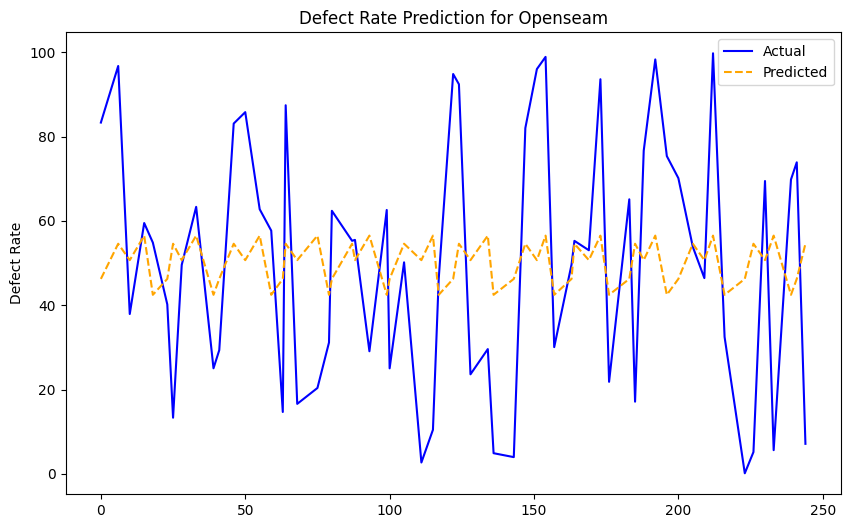

<ipython-input-158-9bc1501ef652>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RMSE for SPI Errors: 31.313035719338263


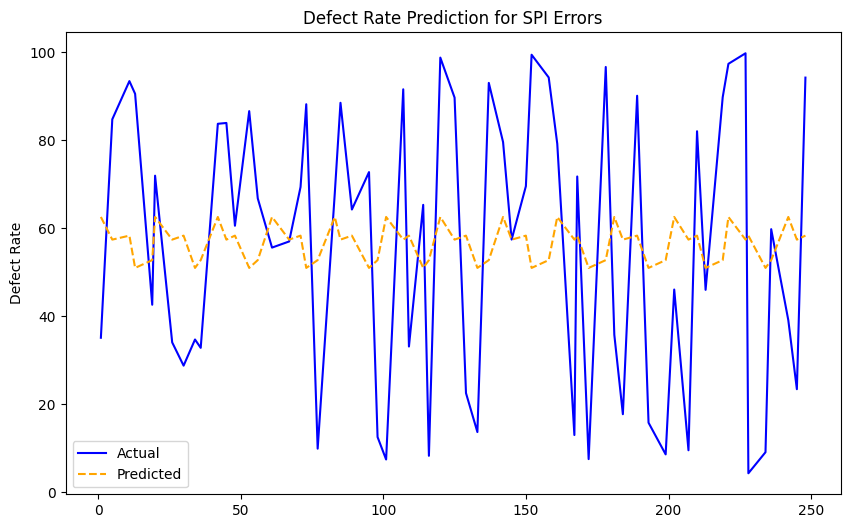

<ipython-input-158-9bc1501ef652>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RMSE for High Low: 27.45141405803827


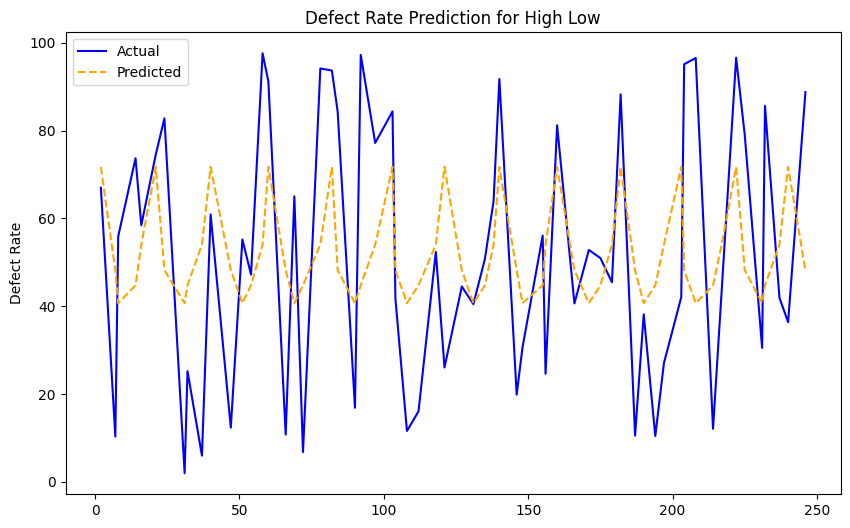

<ipython-input-158-9bc1501ef652>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RMSE for Runoff: 26.466281208549685


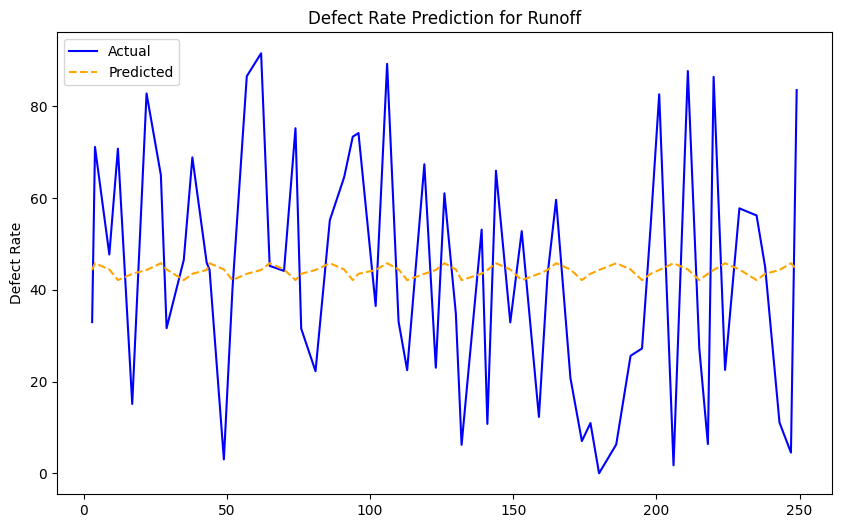

In [158]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Sort by date
time_data = time_data.sort_values(by='Date')

# Get unique defect types
defect_types = time_data['Defect_Type'].unique()

# Loop through each defect type
for defect_type in defect_types:
    # Filter data for the current defect type
    defect_data = time_data[time_data['Defect_Type'] == defect_type]

    # Split features and target variable
    X = defect_data[['Date']]
    y = defect_data['Defect_Rate']

    # Extract additional features from date if needed (e.g., day of the week, month)
    X['Day_of_Week'] = X['Date'].dt.dayofweek
    # Add more feature extraction as needed

    # Remove 'Date' column from X
    X = X.drop(columns=['Date'])

    # Initialize and train the model
    model = RandomForestRegressor()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate RMSE
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f"RMSE for {defect_type}: {rmse}")

    # Visualize predictions
    plt.figure(figsize=(10, 6))
    plt.plot(X.index, y, label='Actual', color='blue')
    plt.plot(X.index, y_pred, label='Predicted', color='orange', linestyle='--')
    plt.xlabel('')
    plt.ylabel('Defect Rate')
    plt.title(f'Defect Rate Prediction for {defect_type}')
    plt.legend()
    plt.show()

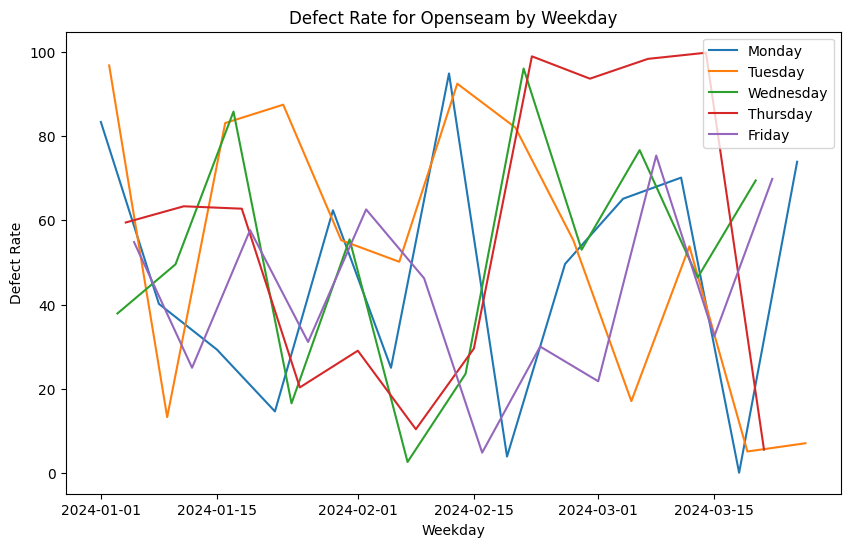

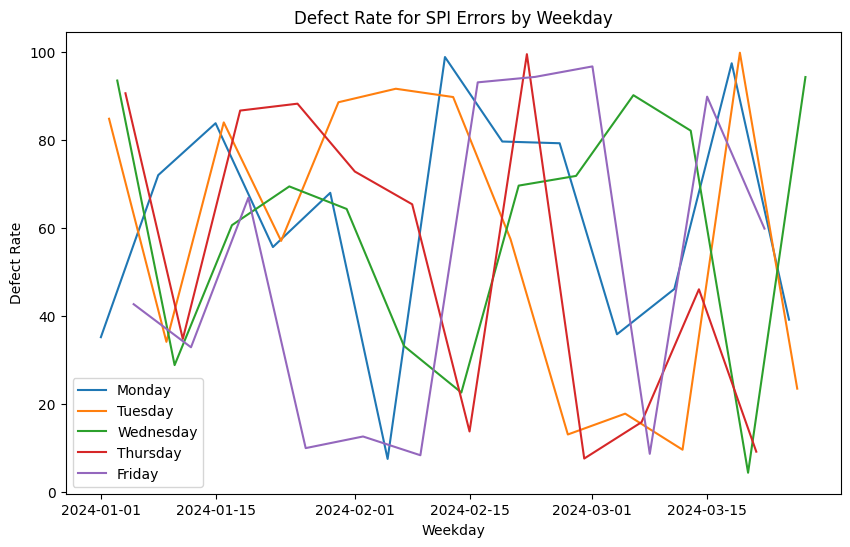

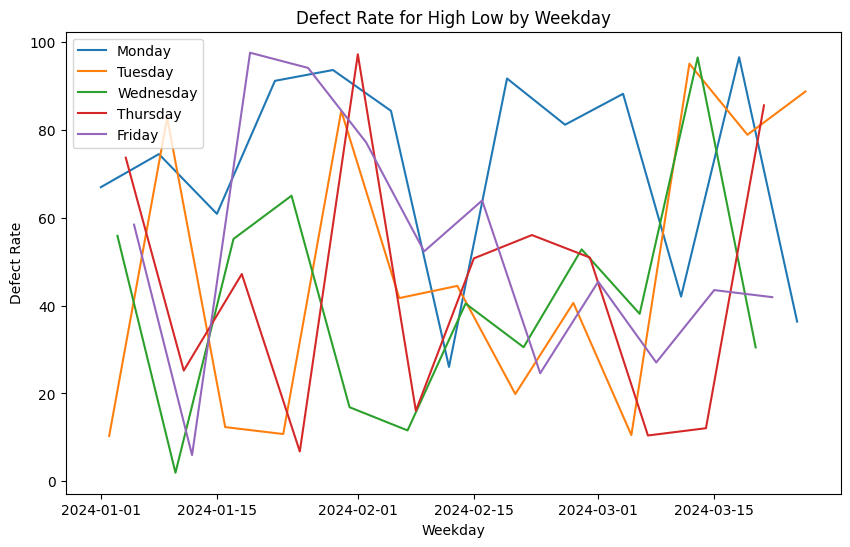

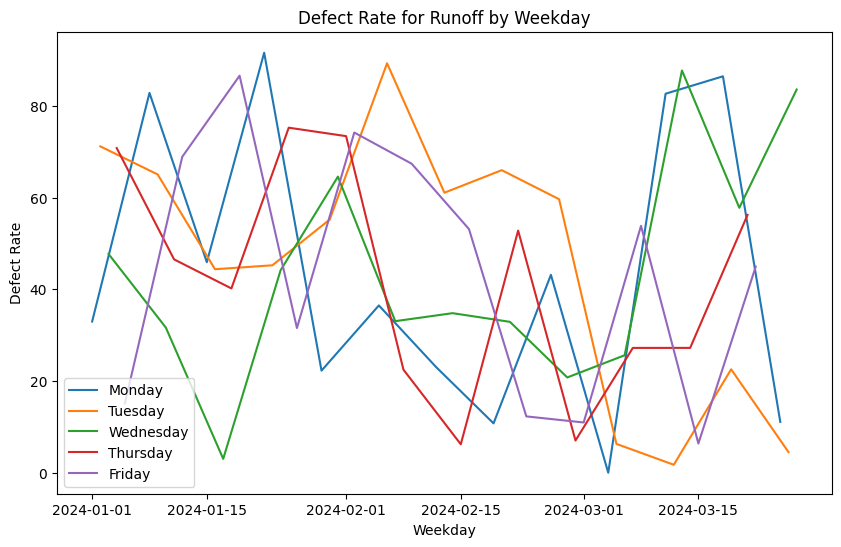

In [159]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Sort by date
time_data = time_data.sort_values(by='Date')

# Get unique defect types
defect_types = time_data['Defect_Type'].unique()

# Define weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Loop through each defect type
for defect_type in defect_types:
    # Filter data for the current defect type
    defect_data = time_data[time_data['Defect_Type'] == defect_type]

    # Group data by weekday
    grouped_data = defect_data.groupby(defect_data['Date'].dt.day_name())

    # Initialize and configure the plot
    plt.figure(figsize=(10, 6))
    plt.title(f'Defect Rate for {defect_type} by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Defect Rate')

    # Plot defect rate for each weekday
    for weekday in weekdays:
        if weekday in grouped_data.groups:
            # Get data for the current weekday
            weekday_data = grouped_data.get_group(weekday)

            # Plot the defect rate for the current weekday
            plt.plot(weekday_data['Date'], weekday_data['Defect_Rate'], label=weekday)

    plt.legend()
    plt.show()


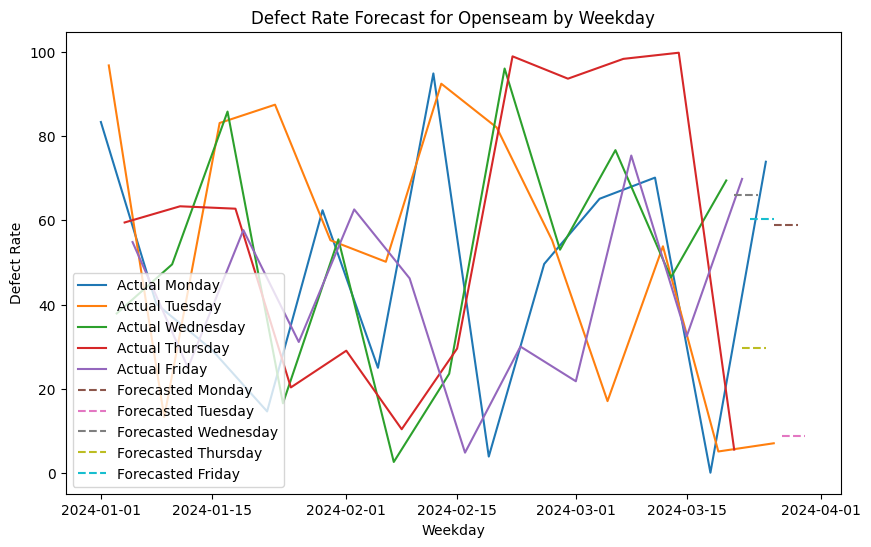

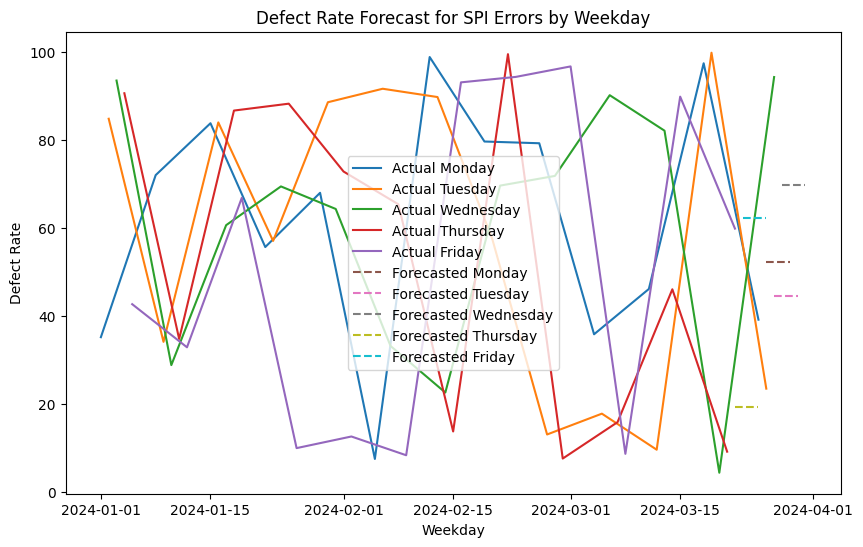

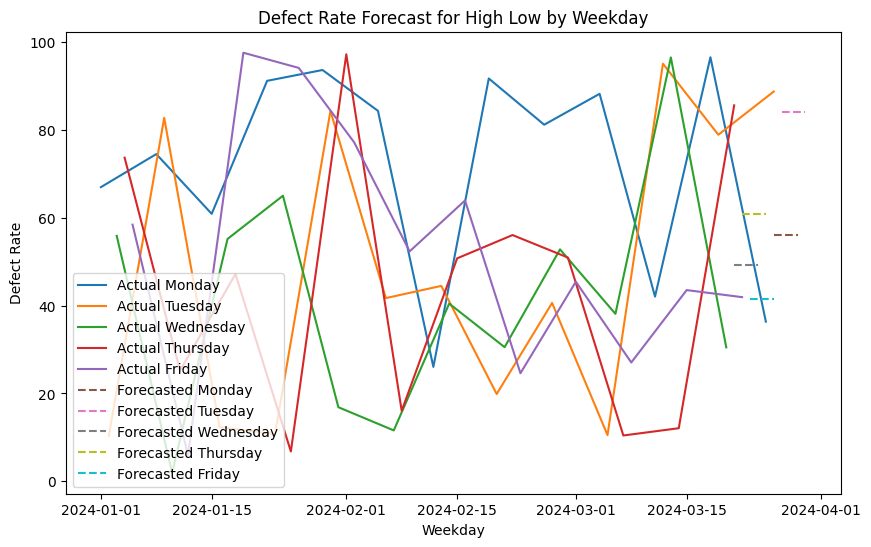

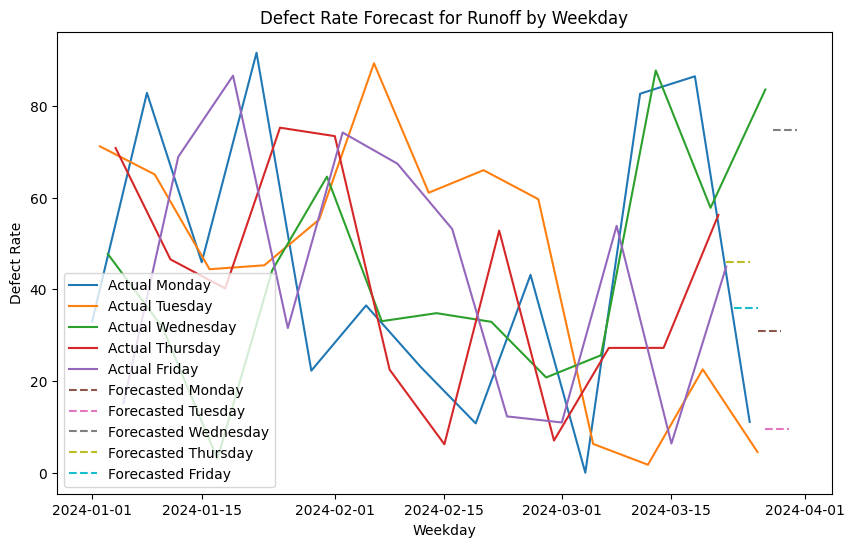

In [160]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Sort by date
time_data = time_data.sort_values(by='Date')

# Get unique defect types
defect_types = time_data['Defect_Type'].unique()

# Define weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Loop through each defect type
for defect_type in defect_types:
    # Filter data for the current defect type
    defect_data = time_data[time_data['Defect_Type'] == defect_type]

    # Group data by weekday
    grouped_data = defect_data.groupby(defect_data['Date'].dt.day_name())

    # Initialize and configure the plot
    plt.figure(figsize=(10, 6))
    plt.title(f'Defect Rate Forecast for {defect_type} by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Defect Rate')

    # Plot actual defect rate
    for weekday in weekdays:
        if weekday in grouped_data.groups:
            # Get data for the current weekday
            weekday_data = grouped_data.get_group(weekday)

            # Plot the actual defect rate for the current weekday
            plt.plot(weekday_data['Date'], weekday_data['Defect_Rate'], label=f'Actual {weekday}')

    # Fit model and forecast for future weekdays
    model = RandomForestRegressor()
    for weekday in weekdays:
        if weekday in grouped_data.groups:
            # Get data for the current weekday
            weekday_data = grouped_data.get_group(weekday)

            # Split data into train and test sets
            X_train = weekday_data[['Date']]
            y_train = weekday_data['Defect_Rate']

            # Fit the model
            model.fit(X_train, y_train)

            # Forecast for future weekdays
            future_dates = pd.date_range(start=X_train['Date'].max(), periods=5, freq='D')[1:]  # Exclude the last date
            future_weekdays = future_dates.strftime('%A')
            future_predictions = model.predict(pd.DataFrame({'Date': future_dates}))

            # Plot the forecasted defect rate for future weekdays
            plt.plot(future_dates, future_predictions, label=f'Forecasted {weekday}', linestyle='--')

    plt.legend()
    plt.show()

In [161]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Sort by date
time_data = time_data.sort_values(by='Date')

# Get unique defect types
defect_types = time_data['Defect_Type'].unique()

# Define weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Initialize dictionaries to store high and low defect types
high_defect = {'Defect_Type': None, 'Defect_Rate': -float('inf')}
low_defect = {'Defect_Type': None, 'Defect_Rate': float('inf')}

# Loop through each defect type
for defect_type in defect_types:
    # Filter data for the current defect type
    defect_data = time_data[time_data['Defect_Type'] == defect_type]

    # Group data by weekday
    grouped_data = defect_data.groupby(defect_data['Date'].dt.day_name())

    # Fit model and forecast for future weekdays
    model = RandomForestRegressor()
    for weekday in weekdays:
        if weekday in grouped_data.groups:
            # Get data for the current weekday
            weekday_data = grouped_data.get_group(weekday)

            # Split data into train and test sets
            X_train = weekday_data[['Date']]
            y_train = weekday_data['Defect_Rate']

            # Fit the model
            model.fit(X_train, y_train)

            # Forecast for future weekdays
            future_dates = pd.date_range(start=X_train['Date'].max(), periods=5, freq='D')[1:]  # Exclude the last date
            future_weekdays = future_dates.strftime('%A')
            future_predictions = model.predict(pd.DataFrame({'Date': future_dates}))

            # Update high and low defect types
            max_pred = max(future_predictions)
            min_pred = min(future_predictions)
            if max_pred > high_defect['Defect_Rate']:
                high_defect['Defect_Type'] = defect_type
                high_defect['Defect_Rate'] = max_pred
            if min_pred < low_defect['Defect_Rate']:
                low_defect['Defect_Type'] = defect_type
                low_defect['Defect_Rate'] = min_pred

            # Print forecasted values
            print(f"{defect_type} Forecast for {weekday}: {future_predictions}")

# Print high and low defect types
print(f"Highest Defect Type: {high_defect['Defect_Type']}, Defect Rate: {high_defect['Defect_Rate']}")
print(f"Lowest Defect Type: {low_defect['Defect_Type']}, Defect Rate: {low_defect['Defect_Rate']}")

# Print model object
print(model.summary())

Openseam Forecast for Monday: [51.85639841 51.85639841 51.85639841 51.85639841]
Openseam Forecast for Tuesday: [11.87135792 11.87135792 11.87135792 11.87135792]
Openseam Forecast for Wednesday: [63.53593005 63.53593005 63.53593005 63.53593005]
Openseam Forecast for Thursday: [38.45311171 38.45311171 38.45311171 38.45311171]
Openseam Forecast for Friday: [59.77527127 59.77527127 59.77527127 59.77527127]
SPI Errors Forecast for Monday: [57.59129255 57.59129255 57.59129255 57.59129255]
SPI Errors Forecast for Tuesday: [43.51239239 43.51239239 43.51239239 43.51239239]
SPI Errors Forecast for Wednesday: [80.26195049 80.26195049 80.26195049 80.26195049]
SPI Errors Forecast for Thursday: [19.27742952 19.27742952 19.27742952 19.27742952]
SPI Errors Forecast for Friday: [62.57864747 62.57864747 62.57864747 62.57864747]
High Low Forecast for Monday: [52.95046847 52.95046847 52.95046847 52.95046847]
High Low Forecast for Tuesday: [83.99987052 83.99987052 83.99987052 83.99987052]
High Low Forecast

AttributeError: 'RandomForestRegressor' object has no attribute 'summary'

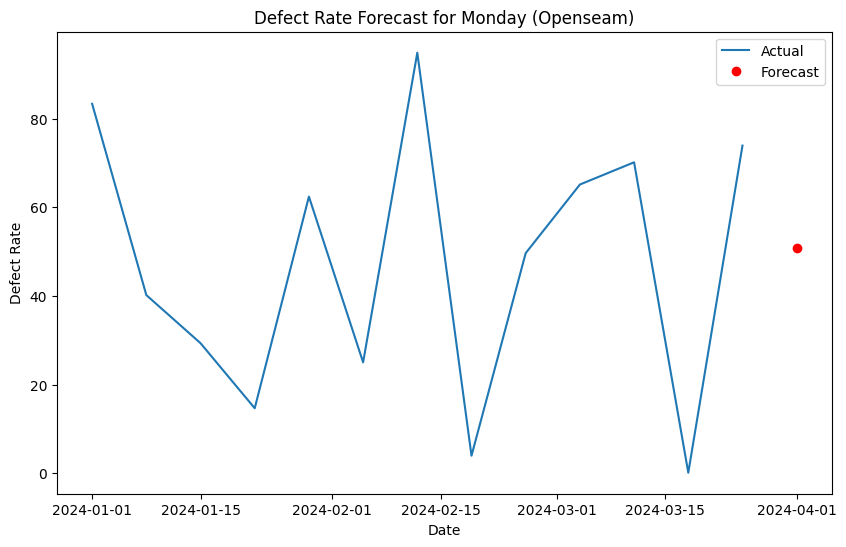

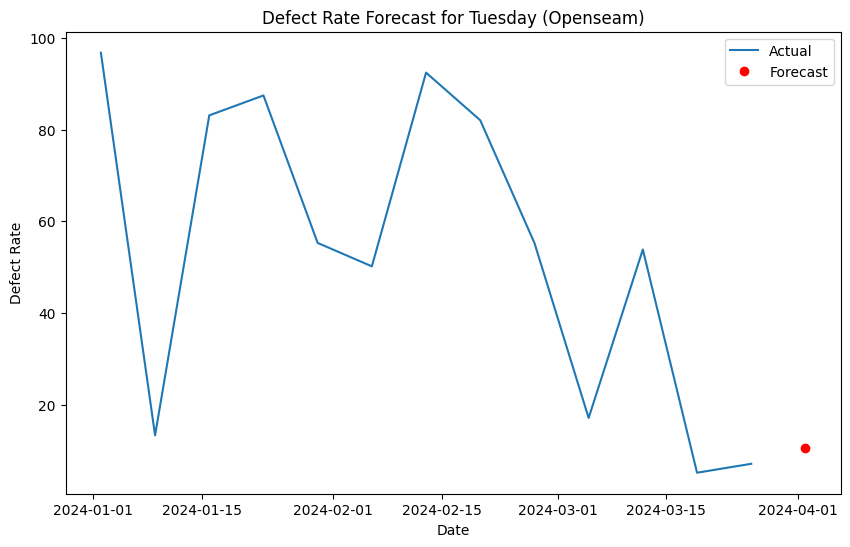

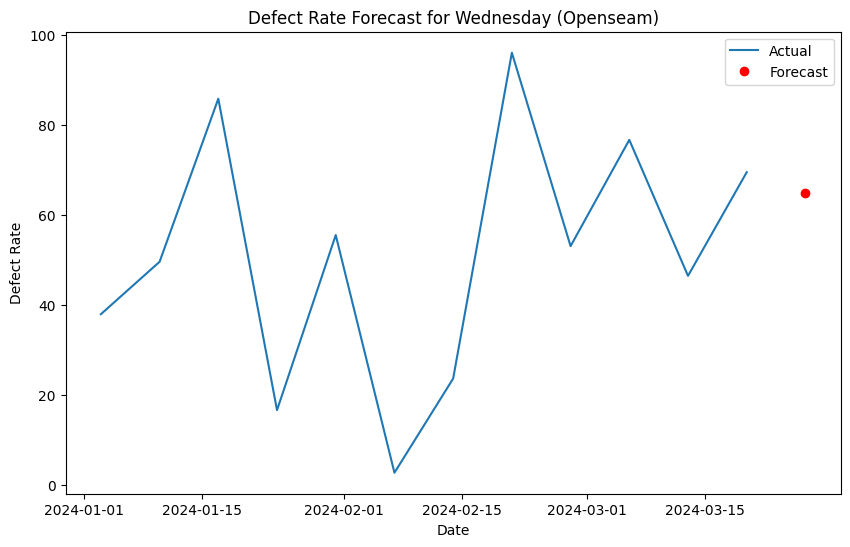

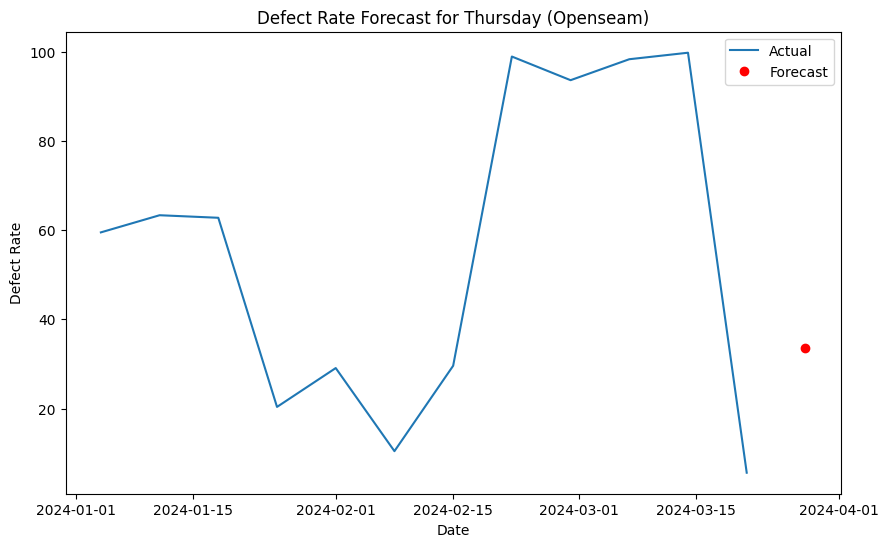

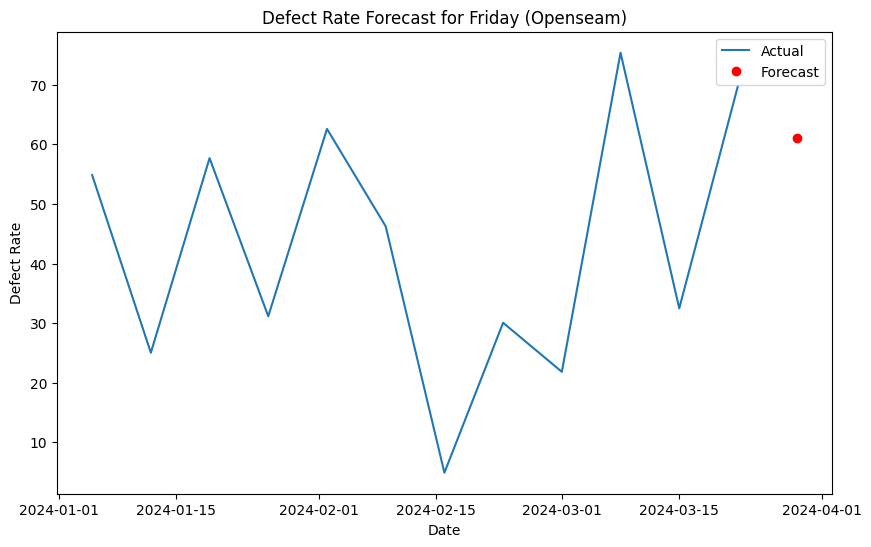

Highest Defect Rate: 64.89446608410206 on Wednesday
Lowest Defect Rate: 10.658611717873768 on Tuesday


In [162]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Sort by date
time_data = time_data.sort_values(by='Date')

# Define the defect type to forecast
defect_type = 'Openseam'  # Change this to the defect type you want to forecast

# Define weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Initialize dictionaries to store high and low defect rates
high_defect = {'Weekday': None, 'Defect_Rate': -float('inf')}
low_defect = {'Weekday': None, 'Defect_Rate': float('inf')}

# Initialize the model
model = RandomForestRegressor()

# Loop through each weekday
for weekday in weekdays:
    # Filter data for the current weekday and defect type
    weekday_data = time_data[(time_data['Date'].dt.day_name() == weekday) & (time_data['Defect_Type'] == defect_type)]

    # Split data into features and target variable
    X = weekday_data[['Date']]
    y = weekday_data['Defect_Rate']

    # Fit the model
    model.fit(X, y)

    # Forecast for the next weekday
    next_weekday = (X['Date'].max() + pd.Timedelta(days=7)).day_name()
    future_date = X['Date'].max() + pd.offsets.CustomBusinessDay(weekmask=next_weekday[:3])
    future_prediction = model.predict(pd.DataFrame({'Date': [future_date]}))[0]

    # Update high and low defect rates
    if future_prediction > high_defect['Defect_Rate']:
        high_defect['Weekday'] = weekday
        high_defect['Defect_Rate'] = future_prediction
    if future_prediction < low_defect['Defect_Rate']:
        low_defect['Weekday'] = weekday
        low_defect['Defect_Rate'] = future_prediction

    # Plot the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(X['Date'], y, label='Actual')
    plt.plot(future_date, future_prediction, 'ro', label='Forecast')
    plt.title(f'Defect Rate Forecast for {weekday} ({defect_type})')
    plt.xlabel('Date')
    plt.ylabel('Defect Rate')
    plt.legend()
    plt.show()

# Print high and low defect rates
print(f"Highest Defect Rate: {high_defect['Defect_Rate']} on {high_defect['Weekday']}")
print(f"Lowest Defect Rate: {low_defect['Defect_Rate']} on {low_defect['Weekday']}")

In [163]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Define custom thresholds for high and low defect rates
high_threshold = 0.05  # Modify this threshold as needed
low_threshold = 0.01   # Modify this threshold as needed

# Initialize variables to store highest and lowest defect rates
highest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': -float('inf')}
lowest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': float('inf')}

# List of defect types and weekdays
defect_types = ['Openseam', 'Runoff', 'SPI Errors', 'High Low']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Loop through each defect type and weekday
for defect_type in defect_types:
    for weekday in weekdays:
        # Filter data for the current defect type and weekday
        data_subset = time_data[(time_data['Date'].dt.day_name() == weekday) & (time_data['Defect_Type'] == defect_type)]

        # Split data into features and target variable
        X = data_subset[['Date']]
        y = data_subset['Defect_Rate']

        # Initialize and train the model
        model = RandomForestRegressor()
        model.fit(X, y)

        # Forecast for the next weekday
        future_date = X['Date'].max() + pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
        future_prediction = model.predict(pd.DataFrame({'Date': [future_date]}))[0]

        # Update highest and lowest defect rates
        if future_prediction > highest_defect['Defect_Rate']:
            highest_defect['Weekday'] = weekday
            highest_defect['Defect_Type'] = defect_type
            highest_defect['Defect_Rate'] = future_prediction
        if future_prediction < lowest_defect['Defect_Rate']:
            lowest_defect['Weekday'] = weekday
            lowest_defect['Defect_Type'] = defect_type
            lowest_defect['Defect_Rate'] = future_prediction

# Print the results
print("Highest Defect Rate:", highest_defect['Defect_Rate'], "on", highest_defect['Weekday'], "for", highest_defect['Defect_Type'])
print("Lowest Defect Rate:", lowest_defect['Defect_Rate'], "on", lowest_defect['Weekday'], "for", lowest_defect['Defect_Type'])


Highest Defect Rate: 84.31914797100956 on Tuesday for High Low
Lowest Defect Rate: 10.225400244578255 on Tuesday for Runoff


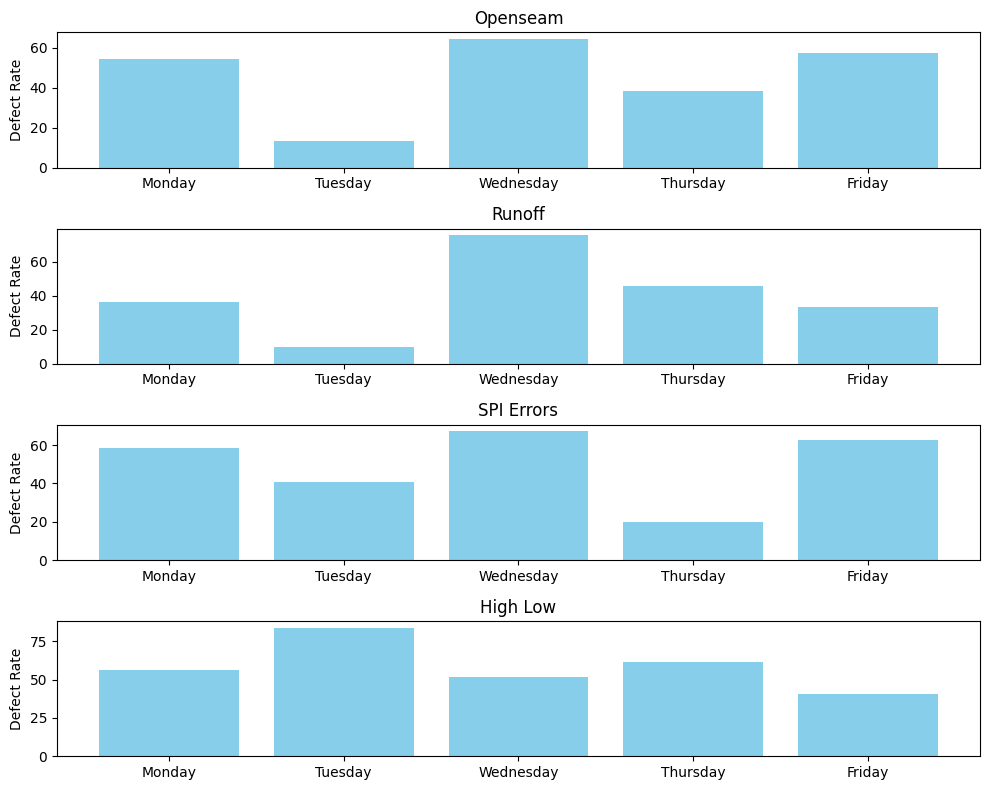

Highest Defect Rate: 83.9818583816636 on Tuesday for High Low
Lowest Defect Rate: 9.700528518532815 on Tuesday for Runoff


In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Define custom thresholds for high and low defect rates
high_threshold = 0.05  # Modify this threshold as needed
low_threshold = 0.01   # Modify this threshold as needed

# Initialize variables to store highest and lowest defect rates
highest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': -float('inf')}
lowest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': float('inf')}

# List of defect types and weekdays
defect_types = ['Openseam', 'Runoff', 'SPI Errors', 'High Low']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Initialize a subplot for each defect type
fig, axs = plt.subplots(len(defect_types), figsize=(10, 8))

# Loop through each defect type
for i, defect_type in enumerate(defect_types):
    # Initialize lists to store defect rates and weekdays
    defect_rates = []
    defect_weekdays = []

    # Loop through each weekday
    for weekday in weekdays:
        # Filter data for the current defect type and weekday
        data_subset = time_data[(time_data['Date'].dt.day_name() == weekday) & (time_data['Defect_Type'] == defect_type)]

        # Split data into features and target variable
        X = data_subset[['Date']]
        y = data_subset['Defect_Rate']

        # Initialize and train the model
        model = RandomForestRegressor()
        model.fit(X, y)

        # Forecast for the next weekday
        future_date = X['Date'].max() + pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
        future_prediction = model.predict(pd.DataFrame({'Date': [future_date]}))[0]

        # Update highest and lowest defect rates
        if future_prediction > highest_defect['Defect_Rate']:
            highest_defect['Weekday'] = weekday
            highest_defect['Defect_Type'] = defect_type
            highest_defect['Defect_Rate'] = future_prediction
        if future_prediction < lowest_defect['Defect_Rate']:
            lowest_defect['Weekday'] = weekday
            lowest_defect['Defect_Type'] = defect_type
            lowest_defect['Defect_Rate'] = future_prediction

        # Append defect rate and weekday to lists
        defect_rates.append(future_prediction)
        defect_weekdays.append(weekday)

    # Plot defect rates for the current defect type
    axs[i].bar(defect_weekdays, defect_rates, color='skyblue')
    axs[i].set_title(defect_type)
    axs[i].set_ylabel('Defect Rate')

# Show the plot
plt.tight_layout()
plt.show()

# Print the results
print("Highest Defect Rate:", highest_defect['Defect_Rate'], "on", highest_defect['Weekday'], "for", highest_defect['Defect_Type'])
print("Lowest Defect Rate:", lowest_defect['Defect_Rate'], "on", lowest_defect['Weekday'], "for", lowest_defect['Defect_Type'])


TypeError: tz must be string or tzinfo subclass.

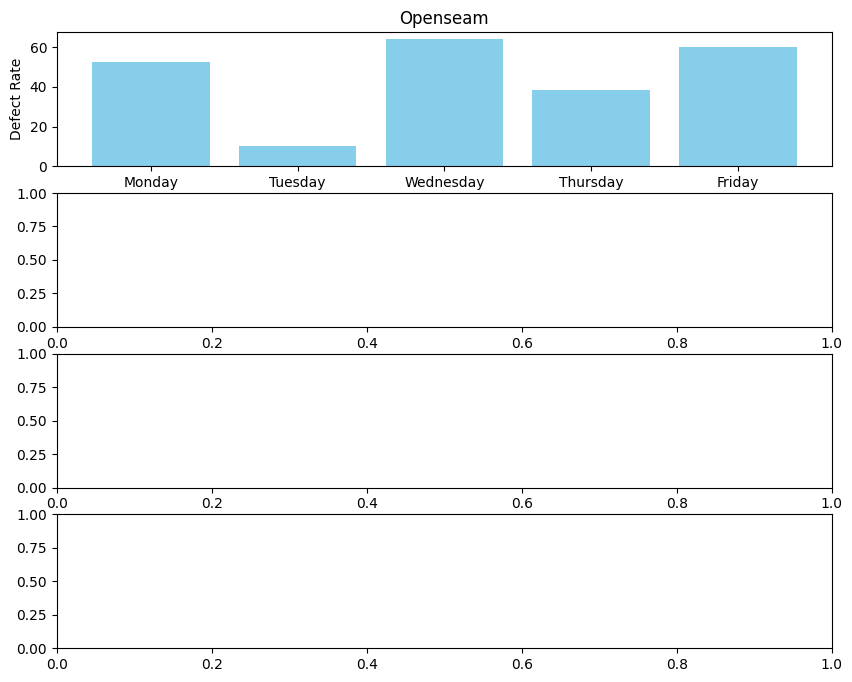

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Define custom thresholds for high and low defect rates
high_threshold = 0.05  # Modify this threshold as needed
low_threshold = 0.01   # Modify this threshold as needed

# Initialize variables to store highest and lowest defect rates
highest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': -float('inf')}
lowest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': float('inf')}

# List of defect types and weekdays
defect_types = ['Openseam', 'Runoff', 'SPI Errors', 'High Low']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Initialize a subplot for each defect type
fig, axs = plt.subplots(len(defect_types), figsize=(10, 8))

# Loop through each defect type
for i, defect_type in enumerate(defect_types):
    # Initialize lists to store defect rates and weekdays
    defect_rates = []
    defect_weekdays = []

    # Loop through each weekday
    for weekday in weekdays:
        # Filter data for the current defect type and weekday
        data_subset = time_data[(time_data['Date'].dt.day_name() == weekday) & (time_data['Defect_Type'] == defect_type)]

        # Split data into features and target variable
        X = data_subset[['Date']]
        y = data_subset['Defect_Rate']

        # Initialize and train the model
        model = RandomForestRegressor()
        model.fit(X, y)

        # Forecast for the next weekday
        future_date = X['Date'].max() + pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
        future_prediction = model.predict(pd.DataFrame({'Date': [future_date]}))[0]

        # Update highest and lowest defect rates
        if future_prediction > highest_defect['Defect_Rate']:
            highest_defect['Weekday'] = weekday
            highest_defect['Defect_Type'] = defect_type
            highest_defect['Defect_Rate'] = future_prediction
        if future_prediction < lowest_defect['Defect_Rate']:
            lowest_defect['Weekday'] = weekday
            lowest_defect['Defect_Type'] = defect_type
            lowest_defect['Defect_Rate'] = future_prediction

        # Append defect rate and weekday to lists
        defect_rates.append(future_prediction)
        defect_weekdays.append(weekday)

    # Plot defect rates for the current defect type
    axs[i].bar(defect_weekdays, defect_rates, color='skyblue', label='Forecasted')
    axs[i].set_title(defect_type)
    axs[i].set_ylabel('Defect Rate')

    # Plot actual defect rates if available
    if not data_subset.empty:
        axs[i].plot(data_subset['Date'], data_subset['Defect_Rate'], marker='o', linestyle='-', color='orange', label='Actual')

# Show legend
for ax in axs:
    ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the results
print("Highest Defect Rate:", highest_defect['Defect_Rate'], "on", highest_defect['Weekday'], "for", highest_defect['Defect_Type'])
print("Lowest Defect Rate:", lowest_defect['Defect_Rate'], "on", lowest_defect['Weekday'], "for", lowest_defect['Defect_Type'])


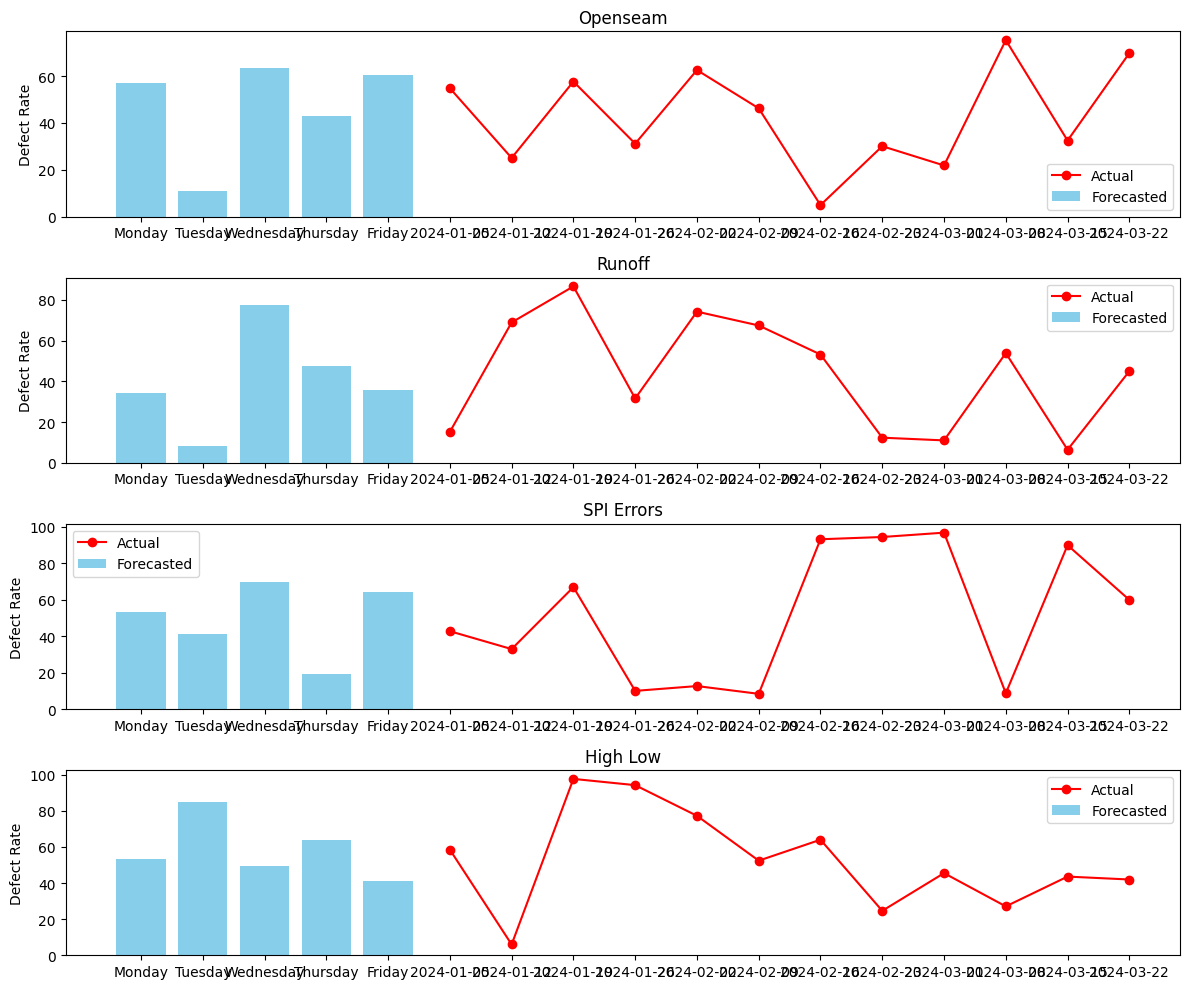

Highest Defect Rate: 84.6766338688462 on Tuesday for High Low
Lowest Defect Rate: 8.338544232787546 on Tuesday for Runoff


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Define custom thresholds for high and low defect rates
high_threshold = 0.05  # Modify this threshold as needed
low_threshold = 0.01   # Modify this threshold as needed

# Initialize variables to store highest and lowest defect rates
highest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': -float('inf')}
lowest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': float('inf')}

# List of defect types and weekdays
defect_types = ['Openseam', 'Runoff', 'SPI Errors', 'High Low']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Initialize a subplot for each defect type
fig, axs = plt.subplots(len(defect_types), figsize=(12, 10))

# Loop through each defect type
for i, defect_type in enumerate(defect_types):
    # Initialize lists to store defect rates and weekdays
    defect_rates = []
    defect_weekdays = []

    # Loop through each weekday
    for weekday in weekdays:
        # Filter data for the current defect type and weekday
        data_subset = time_data[(time_data['Date'].dt.day_name() == weekday) & (time_data['Defect_Type'] == defect_type)]

        # Split data into features and target variable
        X = data_subset[['Date']]
        y = data_subset['Defect_Rate']

        # Initialize and train the model
        model = RandomForestRegressor()
        model.fit(X, y)

        # Forecast for the next weekday
        future_date = X['Date'].max() + pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
        future_prediction = model.predict(pd.DataFrame({'Date': [future_date]}))[0]

        # Update highest and lowest defect rates
        if future_prediction > highest_defect['Defect_Rate']:
            highest_defect['Weekday'] = weekday
            highest_defect['Defect_Type'] = defect_type
            highest_defect['Defect_Rate'] = future_prediction
        if future_prediction < lowest_defect['Defect_Rate']:
            lowest_defect['Weekday'] = weekday
            lowest_defect['Defect_Type'] = defect_type
            lowest_defect['Defect_Rate'] = future_prediction

        # Append defect rate and weekday to lists
        defect_rates.append(future_prediction)
        defect_weekdays.append(weekday)

    # Plot defect rates for the current defect type
    axs[i].bar(defect_weekdays, defect_rates, color='skyblue', label='Forecasted')
    axs[i].set_title(defect_type)
    axs[i].set_ylabel('Defect Rate')

    # Plot actual defect rates if available
    if not data_subset.empty:
        axs[i].plot(data_subset['Date'].astype(str), data_subset['Defect_Rate'], marker='o', linestyle='-', color='red', label='Actual')

# Show legend
for ax in axs:
    ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the results
print("Highest Defect Rate:", highest_defect['Defect_Rate'], "on", highest_defect['Weekday'], "for", highest_defect['Defect_Type'])
print("Lowest Defect Rate:", lowest_defect['Defect_Rate'], "on", lowest_defect['Weekday'], "for", lowest_defect['Defect_Type'])

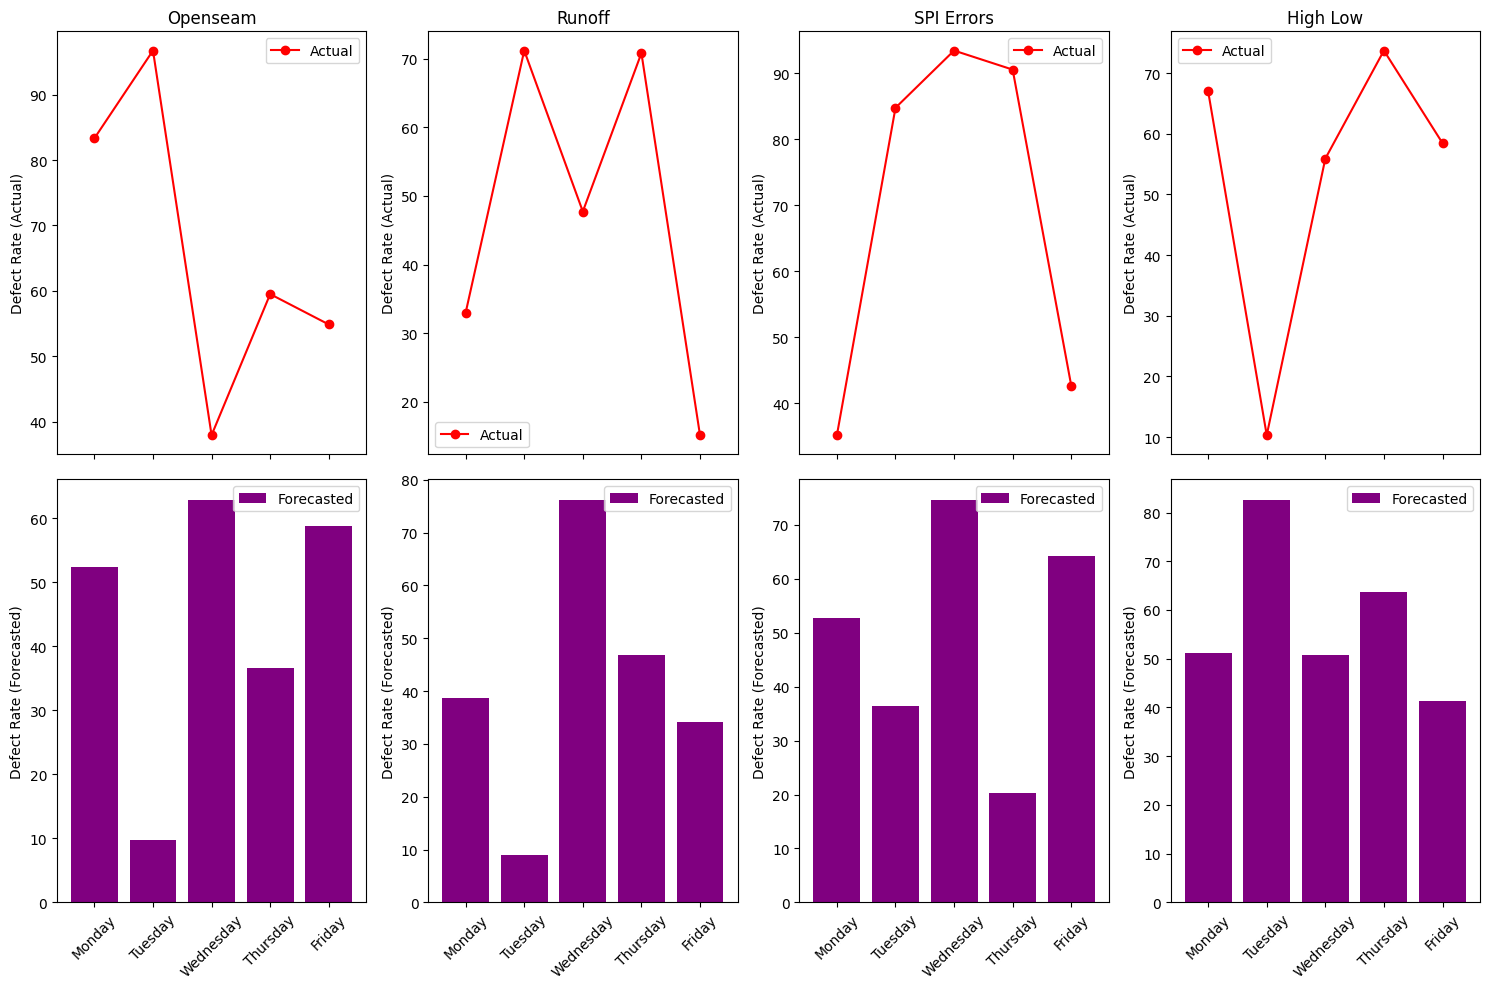

Highest Defect Rate: 82.66095892725485 on Tuesday for High Low
Lowest Defect Rate: 9.014530885463353 on Tuesday for Runoff


In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Define custom thresholds for high and low defect rates
high_threshold = 0.05  # Modify this threshold as needed
low_threshold = 0.01   # Modify this threshold as needed

# Initialize variables to store highest and lowest defect rates
highest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': -float('inf')}
lowest_defect = {'Weekday': None, 'Defect_Type': None, 'Defect_Rate': float('inf')}

# List of defect types and weekdays
defect_types = ['Openseam', 'Runoff', 'SPI Errors', 'High Low']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Initialize figure and axes for actual and forecasted plots
fig, axs = plt.subplots(2, len(defect_types), figsize=(15, 10), sharex=True)

# Loop through each defect type
for i, defect_type in enumerate(defect_types):
    # Initialize lists to store defect rates and weekdays
    actual_defect_rates = []
    forecasted_defect_rates = []
    defect_weekdays = []

    # Loop through each weekday
    for weekday in weekdays:
        # Filter data for the current defect type and weekday
        data_subset = time_data[(time_data['Date'].dt.day_name() == weekday) & (time_data['Defect_Type'] == defect_type)]

        # Split data into features and target variable
        X = data_subset[['Date']]
        y = data_subset['Defect_Rate']

        # Initialize and train the model
        model = RandomForestRegressor()
        model.fit(X, y)

        # Forecast for the next weekday
        future_date = X['Date'].max() + pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')
        future_prediction = model.predict(pd.DataFrame({'Date': [future_date]}))[0]

        # Update highest and lowest defect rates
        if future_prediction > highest_defect['Defect_Rate']:
            highest_defect['Weekday'] = weekday
            highest_defect['Defect_Type'] = defect_type
            highest_defect['Defect_Rate'] = future_prediction
        if future_prediction < lowest_defect['Defect_Rate']:
            lowest_defect['Weekday'] = weekday
            lowest_defect['Defect_Type'] = defect_type
            lowest_defect['Defect_Rate'] = future_prediction

        # Append defect rate and weekday to lists
        if not data_subset.empty:
            actual_defect_rates.append(data_subset['Defect_Rate'].values[0])
        else:
            actual_defect_rates.append(None)
        forecasted_defect_rates.append(future_prediction)
        defect_weekdays.append(weekday)

    # Plot actual defect rates for the current defect type
    axs[0, i].plot(defect_weekdays, actual_defect_rates, marker='o', linestyle='-', color='red', label='Actual')
    axs[0, i].set_title(defect_type)
    axs[0, i].set_ylabel('Defect Rate (Actual)')
    axs[0, i].tick_params(axis='x', rotation=45)
    axs[0, i].legend()

    # Plot forecasted defect rates for the current defect type
    axs[1, i].bar(defect_weekdays, forecasted_defect_rates, color='purple', label='Forecasted')
    axs[1, i].set_ylabel('Defect Rate (Forecasted)')
    axs[1, i].tick_params(axis='x', rotation=45)
    axs[1, i].legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the results
print("Highest Defect Rate:", highest_defect['Defect_Rate'], "on", highest_defect['Weekday'], "for", highest_defect['Defect_Type'])
print("Lowest Defect Rate:", lowest_defect['Defect_Rate'], "on", lowest_defect['Weekday'], "for", lowest_defect['Defect_Type'])


<ipython-input-188-e0a811cb3440>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



RMSE on training set: 28.568306637996233
RMSE on testing set: 33.94002501182309


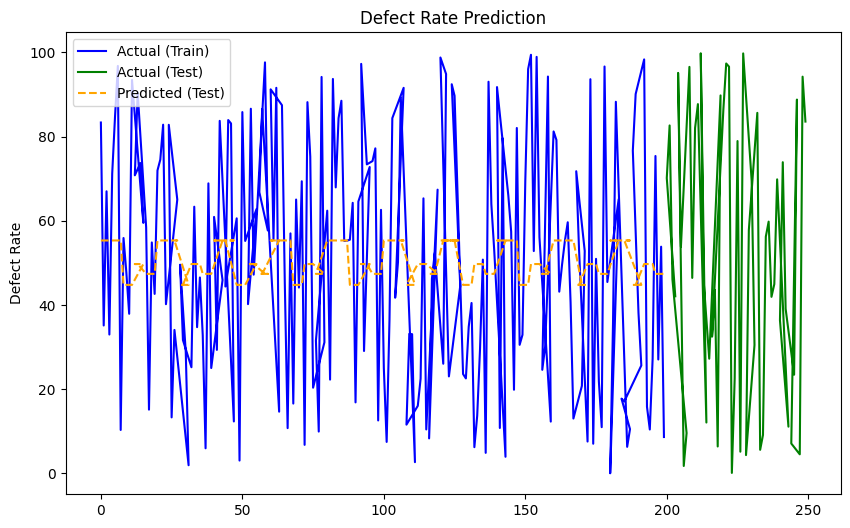

In [188]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Sort by date
time_data = time_data.sort_values(by='Date')

# Split features and target variable
X = time_data[['Date']]
y = time_data['Defect_Rate']

# Extract additional features from date if needed (e.g., day of the week, month)
X['Day_of_Week'] = X['Date'].dt.dayofweek
# Add more feature extraction as needed

# Split data into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Remove 'Date' column from X_train and X_test
X_train = X_train.drop(columns=['Date'])
X_test = X_test.drop(columns=['Date'])

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"RMSE on training set: {rmse_train}")
print(f"RMSE on testing set: {rmse_test}")

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(X_train.index, y_train, label='Actual (Train)', color='blue')
plt.plot(X_test.index, y_test, label='Actual (Test)', color='green')
# plt.plot(X_train.index, y_pred_train, label='Predicted (Test)', color='orange', linestyle='--')
plt.plot(X_train.index, y_pred_train, label='Predicted (Test)', color='orange', linestyle='--')
plt.xlabel('')
plt.ylabel('Defect Rate')
plt.title('Defect Rate Prediction')
plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (50,) and (6,)

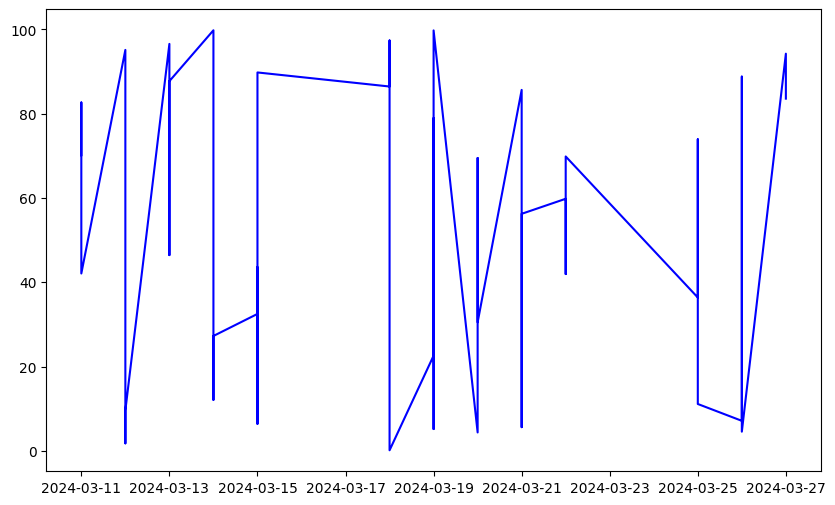

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Defect_Rate'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs. Predicted Defect Rate')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

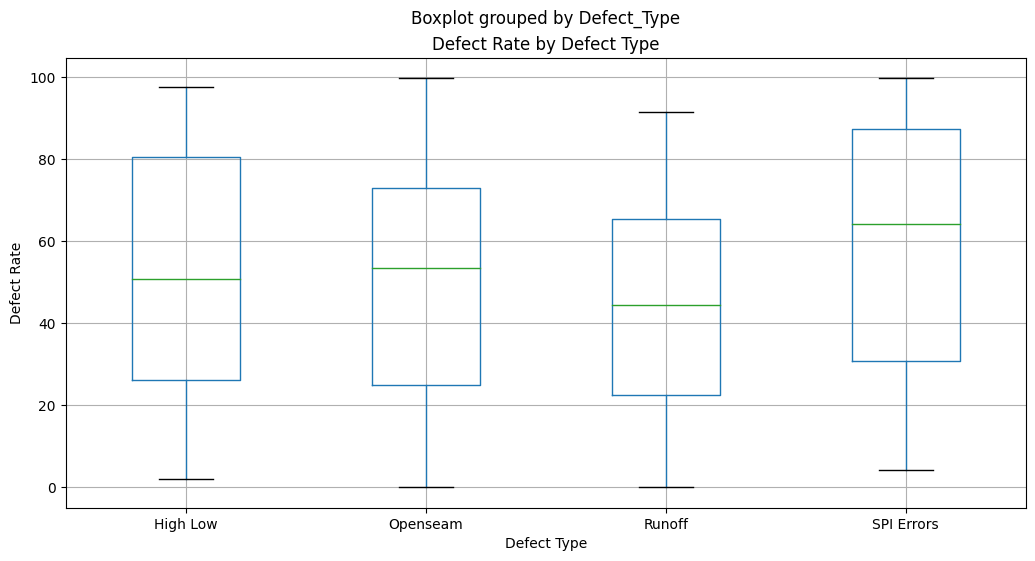

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
time_data = pd.read_csv('/content/drive/MyDrive/time_series_data_01.csv')

# Convert 'Date' column to datetime
time_data['Date'] = pd.to_datetime(time_data['Date'])

# Plot boxplot
plt.figure(figsize=(10, 6))
time_data.boxplot(column='Defect_Rate', by='Defect_Type', figsize=(12, 6))
plt.title('Defect Rate by Defect Type')
plt.xlabel('Defect Type')
plt.ylabel('Defect Rate')
plt.show()
